# Geopandas
Geopandas adalah modul Python yang memperluas kemampuan pandas (modul pengolahan data tabular) untuk menangani data geospasial. Dengan GeoPandas, kita dapat melakukan operasi spasial pada tipe data geometris seperti titik, garis, dan poligon.

Pada sesi ini kita akan belajar mengenai:
1. **Cara membuat geodataframe**
2. **Mengeksplor dan memvisualisasikan geodataframe secara sederhana**
3. **Memfilter data**
4. **Export geodataframe**

Pada dasarnya pengoprasian geodataframe(geopandas) akan sama dengan dataframe(pandas), bedanya adalah terdapat kolom yang bisa menangani data geometry yang merupakan ekstensi dari modul shapely. Penjelasan lebih lanjut bisa dilihat dalam dokumentasi geopandas ( https://geopandas.org/en/stable/docs/user_guide.html )

![title](image/geodataframe.png)

# Membuat Geodataframe
Berikut beberapa cara yang dapat dilakukan untuk membuat geodataframe:
1. Membentuk geometri dari shapely secara manual
2. Meload data spatial pada csv atau excel kemudian diolah menjadi geodataframe
3. Meload data dari format shapefile atau geopackage

<h3>Membentuk geometry secara manual</h3>

      name                        geometry
0    titik                     POINT (1 1)
1    garis      LINESTRING (2 0, 2 2, 1 2)
2  polygon  POLYGON ((0 0, 1 1, 1 0, 0 0))


name                        geometry
0    titik                     POINT (1 1)
1    garis      LINESTRING (2 0, 2 2, 1 2)
2  polygon  POLYGON ((0 0, 1 1, 1 0, 0 0))

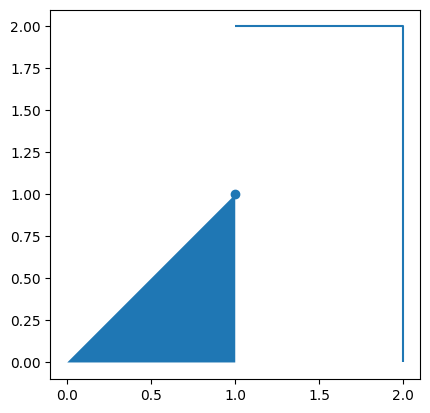

In [1]:
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon

point = Point(1, 1)
line = LineString([(2, 0), (2, 2), (1, 2)])
polygon = Polygon([(0, 0), (1, 1), (1, 0)])

data = {
    'name': ['titik', 'garis', 'polygon'],
    'geometry': [point, line, polygon]
}

gdf = gpd.GeoDataFrame(data, crs="EPSG:4326")

print(gdf)
gdf.plot()
gdf.head()

<h3>Meload data dari csv </h3>

        name  longitude  latitude  magnitude
0  Location1      102.0      -0.5          1
1  Location2      103.5       1.0          2
2  Location3      104.0      -1.5          3
3  Location4      105.5       2.0          4


name  longitude  latitude  magnitude          geometry
0  Location1      102.0      -0.5          1  POINT (102 -0.5)
1  Location2      103.5       1.0          2   POINT (103.5 1)
2  Location3      104.0      -1.5          3  POINT (104 -1.5)
3  Location4      105.5       2.0          4   POINT (105.5 2)

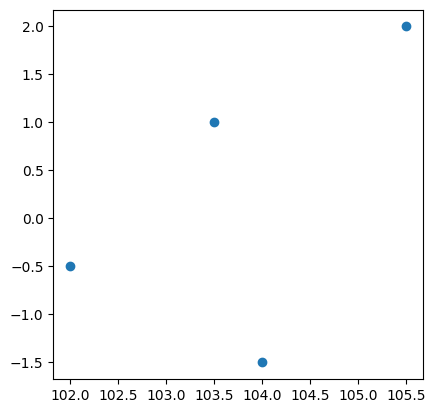

In [3]:
import pandas as pd

df = pd.read_csv('data/1_simple_point.csv')

print(df)

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

gdf.plot()
gdf.head()

<h3>Meload data dari format shapefile</h3>

SYMBOLS          NM_LEMBAR  NO_LEMBAR  PROJECT                 NAME  \
0   Danau          MUARATEWE       1715     None                 None   
1   Danau          PONTIANAK       1315     None                 None   
2    JKld      LONG PAHANGAI       1716  INDOKAL  Komplek Danau Hitam   
3    JKlk      LONG PAHANGAI       1716  INDOKAL       Komplek Kapuas   
4    JKlk  PEGUNUNGAN KAPUAS       1617  INDOKAL       Komplek Kapuas   

             FORMATION                   CLASS_LITH             T_CLASS_EN  \
0                 None                         None                   None   
1                 None                         None                   None   
2  Komplek Danau Hitam                      ofiolit  Gunungapi: bawah laut   
3       Komplek Kapuas  Batuan ekstrusi: basa: lava       Akrasi: samudera   
4       Komplek Kapuas  Batuan ekstrusi: basa: lava       Akrasi: samudera   

              B_CLASS_EN DESCRIP1  Shape_Leng  Shape_Area  \
0                   None     None    0.136511    0.000952   
1                   None     None    0.147867    0.000610   
2  Gunungapi: bawah laut     None    0.278338    0.002072   
3       Akrasi: samudera     None    0.338369    0.001466   
4       Akrasi: samudera     None    2.990407    0.072681   

                                            geometry  
0  POLYGON Z ((116.54084 -0.02206 0, 116.53757 -0...  
1  POLYGON Z ((116.55919 -0.04594 0, 116.56544 -0...  
2  POLYGON Z ((115.0863 0.91415 0, 115.07922 0.90...  
3  MULTIPOLYGON Z (((114.6175 0.88733 0, 114.6155...  
4  POLYGON Z ((113.90081 0.96945 0, 113.89773 0.9...

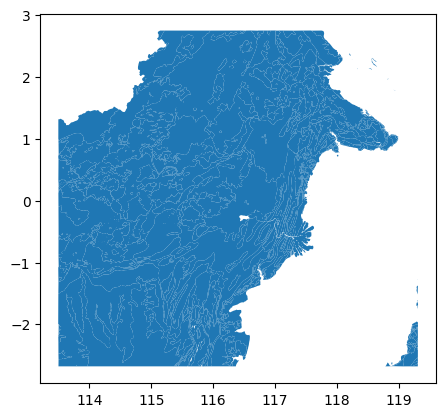

In [4]:
gdf = gpd.read_file("data/geology_kalimantan_timur/Geology Kalimantan Timur.shp")
gdf.plot()
gdf.head()

# Viewing and Exploring GeoDataFrames

In [17]:
print("===================================================================================")
print("PRINT")
print("===================================================================================")
print(gdf)
print("===================================================================================")
print("HEAD")
print("===================================================================================")
print(gdf.head())
print("===================================================================================")
print("===================================================================================")
print("TAIL")
print("===================================================================================")
print(gdf.tail())
print("===================================================================================")
print("===================================================================================")
print("DESCRIBE")
print("===================================================================================")
print(gdf.describe())
print("===================================================================================")
print("===================================================================================")
print("COLUMNS")
print("===================================================================================")
print(gdf.columns)
print("===================================================================================")
print("===================================================================================")
print("DATA TYPE")
print("===================================================================================")
print(gdf.dtypes)
print("===================================================================================")

PRINT
    SYMBOLS          NM_LEMBAR  NO_LEMBAR   PROJECT  \
0     Danau          MUARATEWE       1715      None   
1     Danau          PONTIANAK       1315      None   
2      JKld      LONG PAHANGAI       1716   INDOKAL   
3      JKlk      LONG PAHANGAI       1716   INDOKAL   
4      JKlk  PEGUNUNGAN KAPUAS       1617   INDOKAL   
..      ...                ...        ...       ...   
222    TQmm          MUARATEWE       1715   INDOKAL   
223    TQmm         MUARAWAHAU       1817   INDOKAL   
224    TQmm             NAPAKU       1818   INDOKAL   
225     TQp         PASANGKAYU       2014  INDOSULA   
226   TQps2      TANJUNG REDEP       1918   INDOKAL   

                          NAME                  FORMATION  \
0                         None                       None   
1                         None                       None   
2          Komplek Danau Hitam        Komplek Danau Hitam   
3               Komplek Kapuas             Komplek Kapuas   
4               Komplek Kapu

In [19]:
gdf.explore(column="FORMATION",categorical=True)

# Selecting and Filtering Data

Untuk menseleksi ataupun memfilter data, kita bisa menggunakan konsep yang sama seperti pandas (https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)

In [5]:
from shapely.geometry import Point

df = pd.read_csv('data/1_simple_point.csv')
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
print(gdf.head())

print("=================================================================")
print("Berdasarkan kesamaan nama atribut")
print("=================================================================")
selected_gdf1 = gdf[gdf['name'] == 'Location1']
print(selected_gdf1)

print("=================================================================")
print("Berdasarkan perbandingan nilai atribut")
print("=================================================================")
selected_gdf2 = gdf[gdf['magnitude'] >= 3]
print(selected_gdf2)

print("=================================================================")
print("Berdasarkan posisi terhadap geometry lain")
print("=================================================================")
point = Point(102.0,-0.5)
selected_gdf3 = gdf[gdf.distance(point) < 3]
print(selected_gdf3)

print(selected_gdf3.geometry[0].area)

        name  longitude  latitude  magnitude          geometry
0  Location1      102.0      -0.5          1  POINT (102 -0.5)
1  Location2      103.5       1.0          2   POINT (103.5 1)
2  Location3      104.0      -1.5          3  POINT (104 -1.5)
3  Location4      105.5       2.0          4   POINT (105.5 2)
Berdasarkan kesamaan nama atribut
        name  longitude  latitude  magnitude          geometry
0  Location1      102.0      -0.5          1  POINT (102 -0.5)
Berdasarkan perbandingan nilai atribut
        name  longitude  latitude  magnitude          geometry
2  Location3      104.0      -1.5          3  POINT (104 -1.5)
3  Location4      105.5       2.0          4   POINT (105.5 2)
Berdasarkan posisi terhadap geometry lain
        name  longitude  latitude  magnitude          geometry
0  Location1      102.0      -0.5          1  POINT (102 -0.5)
1  Location2      103.5       1.0          2   POINT (103.5 1)
2  Location3      104.0      -1.5          3  POINT (104 -1.5)
0.0

# Export Hasil Geodataframe

Untuk mengeksport geodataframe kita bisa menggunakan metode **to_file** atau bisa langsung ke dalam database postgresql menggunakan metode **to_postgis**

In [7]:
# Karena kita membuat object pure dari geometry tanpa memasang koordinat sistem
# Kita perlu melakukan set coordinate reference system (CRS) pada data
gdf.set_crs("EPSG:4326", inplace=True)
gdf.to_file('./export_dir/export_gdf1.shp')
gdf.to_file('./export_dir/export_gdf1.geojson', driver='GeoJSON')